In [117]:
# Importing necessary libraries
import os
import matplotlib.pyplot as plt  # For plotting
import numpy as np
import pandas as pd
import seaborn as sns  # For data visualization

In [118]:
# Importing platform module to get system information
import platform

print(platform.platform())

!pip install wget

import wget

# File URL and name for download
file_url = 'https://drive.google.com/uc?export=download&id=18of26WRpTT5k0S-8DRDa1M27LBeKb3B8'
file_name = 'BoilerNoise-bc05-s3-044.csv'

# Downloading the file using wget
wget.download(file_url, file_name)

df = pd.read_csv(file_name)

print(df.head())


Linux-6.1.58+-x86_64-with-glibc2.35
   TimeDeltaIndex  Time_s  P_fuel_kW  P_thermal_kW  T_out_degC  G_losses  \
0               0       0    5733.94       5937.50       20.00     750.0   
1             300     300    5733.94       5155.89       48.77     750.0   
2             600     600    3092.44       2719.57       72.76     750.0   
3             900     900     774.76        657.43       74.84     750.0   
4            1200    1200     757.55        642.27       74.87     750.0   

    eta  T_ext_degC  P_demand_kW  T_supply_degC  T_return_degC  anomaly  
0  1.04       19.10       612.31           75.0          52.42        0  
1  0.90       18.93       609.32           75.0          52.54        0  
2  0.88       18.77       606.34           75.0          52.66        0  
3  0.85       18.60       603.36           75.0          52.77        0  
4  0.85       18.43       600.37           75.0          52.89        0  


In [119]:
# Defining target variable and hidden variables
TARGET_VAR = 'anomaly'
HIDDEN_VARS = ['Time_s', 'eta','G_losses']

In [120]:
# Creating feature matrix X and target vector y
X= df.drop(columns=[TARGET_VAR] + HIDDEN_VARS)
y= df[TARGET_VAR]

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TimeDeltaIndex  8064 non-null   int64  
 1   Time_s          8064 non-null   int64  
 2   P_fuel_kW       8064 non-null   float64
 3   P_thermal_kW    8064 non-null   float64
 4   T_out_degC      8064 non-null   float64
 5   G_losses        8064 non-null   float64
 6   eta             8064 non-null   float64
 7   T_ext_degC      8064 non-null   float64
 8   P_demand_kW     8064 non-null   float64
 9   T_supply_degC   8064 non-null   float64
 10  T_return_degC   8064 non-null   float64
 11  anomaly         8064 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 756.1 KB


In [122]:
df.head()

,TimeDeltaIndex,Time_s,P_fuel_kW,P_thermal_kW,T_out_degC,G_losses,eta,T_ext_degC,P_demand_kW,T_supply_degC,T_return_degC,anomaly
0,0,0,5733.94,5937.50,20.00,750.0,1.04,19.10,612.31,75.0,52.42,0
1,300,300,5733.94,5155.89,48.77,750.0,0.90,18.93,609.32,75.0,52.54,0
2,600,600,3092.44,2719.57,72.76,750.0,0.88,18.77,606.34,75.0,52.66,0
3,900,900,774.76,657.43,74.84,750.0,0.85,18.60,603.36,75.0,52.77,0
4,1200,1200,757.55,642.27,74.87,750.0,0.85,18.43,600.37,75.0,52.89,0


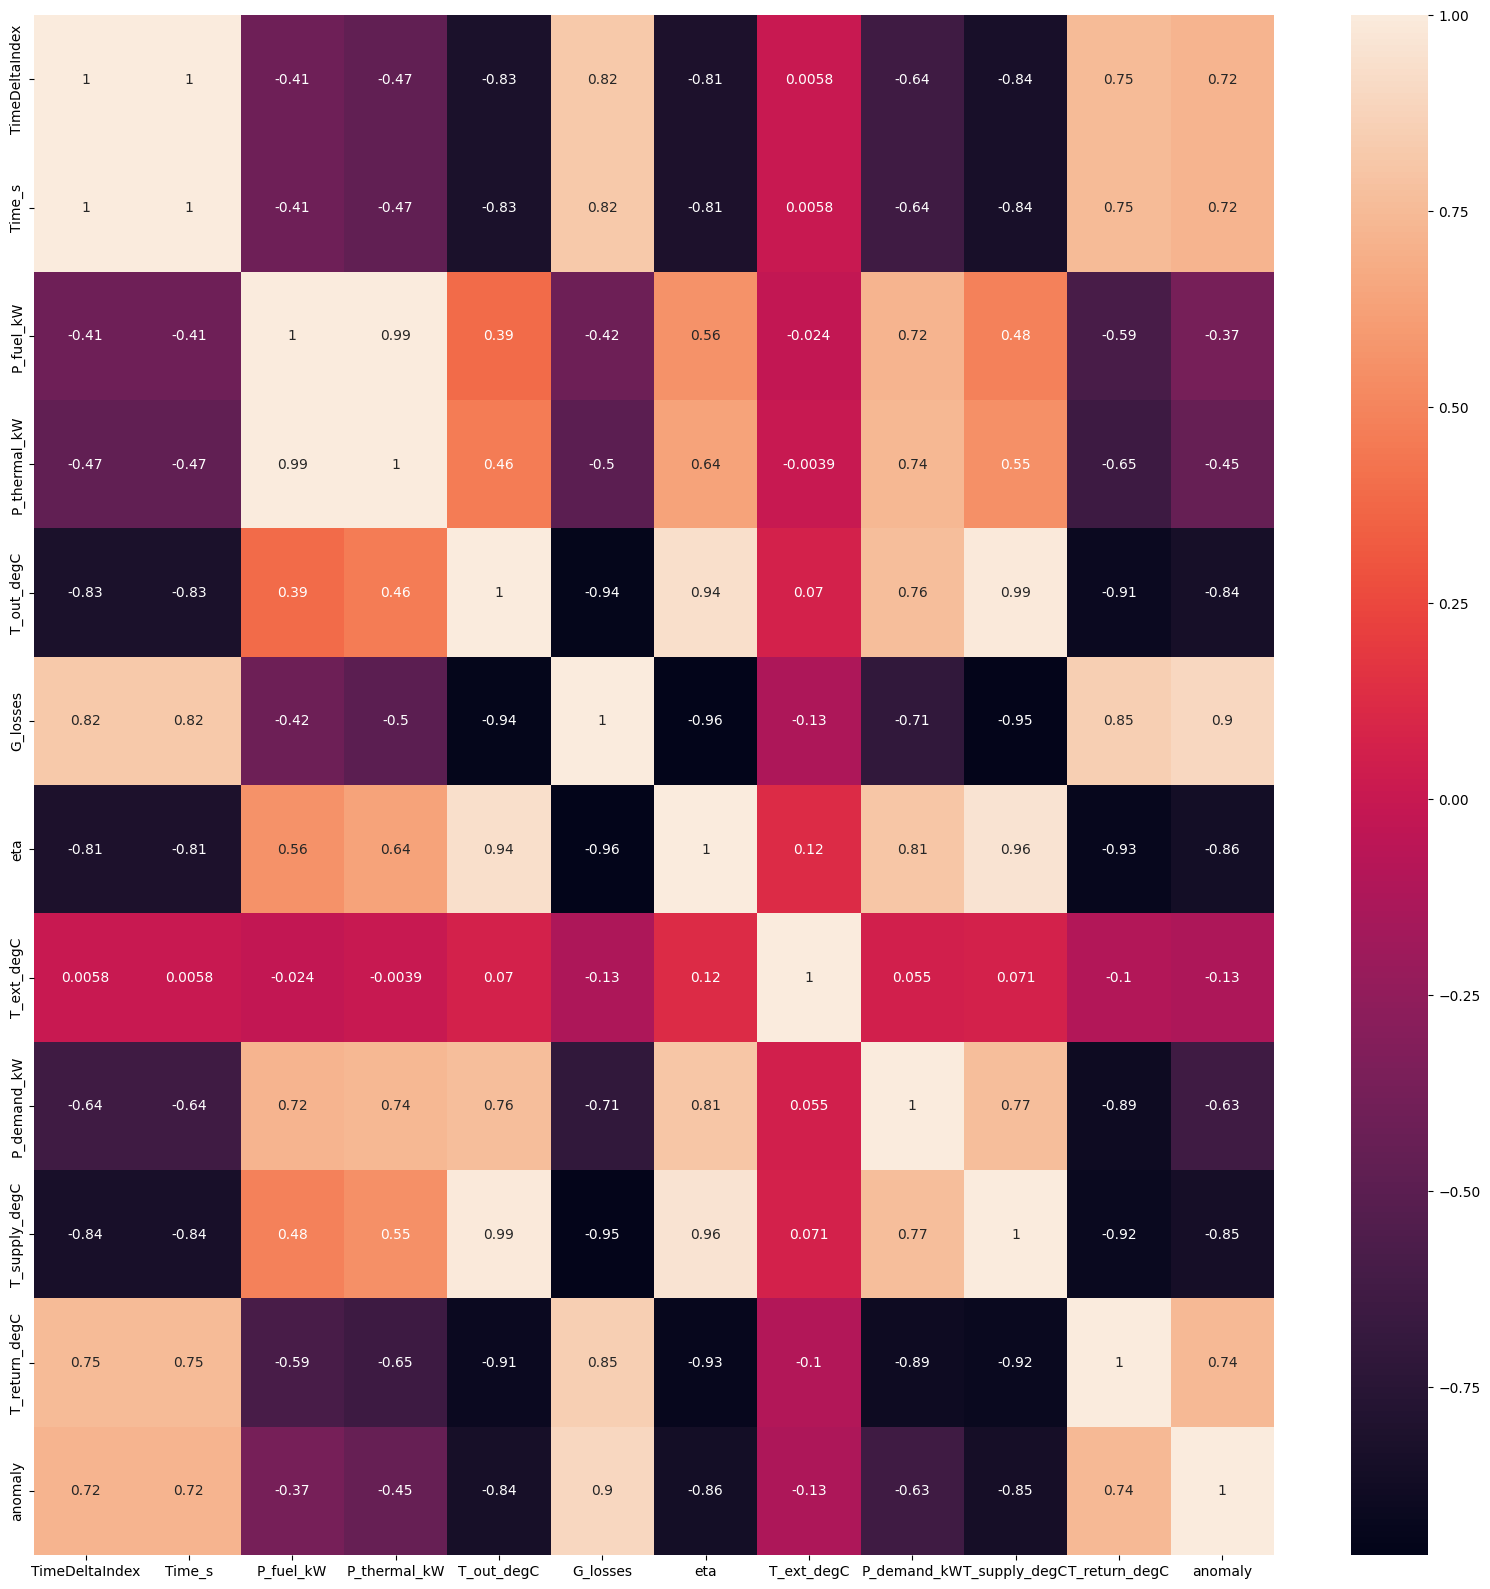

In [123]:
# Plotting Heatmap
plt.figure(figsize=(20, 20));
sns.heatmap(df.corr(), annot=True);
plt.show()

In [124]:
# Checking for Null values
missing_counts = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_counts)

Number of missing values in each column:
TimeDeltaIndex    0
Time_s            0
P_fuel_kW         0
P_thermal_kW      0
T_out_degC        0
G_losses          0
eta               0
T_ext_degC        0
P_demand_kW       0
T_supply_degC     0
T_return_degC     0
anomaly           0
dtype: int64


In [125]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Scaling the data
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)
# PCA
num_components = 4
pca = PCA(n_components=num_components)

X_pca_data = pca.fit_transform(X_scaled_data)



In [126]:
#logisitic regression

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error

# Test-Train Split

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_pca_data, y, test_size=0.2, random_state=66)

model_lr = LogisticRegression(C=1.4772, max_iter=611, n_jobs=15, random_state=3, tol=1e-05)

model_lr.fit(X_train_data, y_train_data)
y_pred_data = model_lr.predict(X_test_data)

accuracy_lr = accuracy_score(y_test_data, y_pred_data)
mse_lr = mean_squared_error(y_test_data, y_pred_data)
rmse_lr = mean_squared_error(y_test_data, y_pred_data, squared=False)

# Printing Accuracy and Error

print(f"Accuracy: {accuracy_lr}")
print(f"MSE: {mse_lr}")
print(f"RMSE: {rmse_lr}")


Accuracy: 0.9280843149411035
MSE: 0.6472411655300682
RMSE: 0.8045129989814137


In [127]:
# Matthews Correlation Coefficient and Accuracy Score
from sklearn.metrics import matthews_corrcoef, accuracy_score

mcc_score = matthews_corrcoef(y_test_data, y_pred_data)
print("MCC: %.3f" % mcc_score)

accuracy = accuracy_score(y_test_data, y_pred_data)
print("Accuracy: %.3f" % accuracy)


MCC: 0.843
Accuracy: 0.928


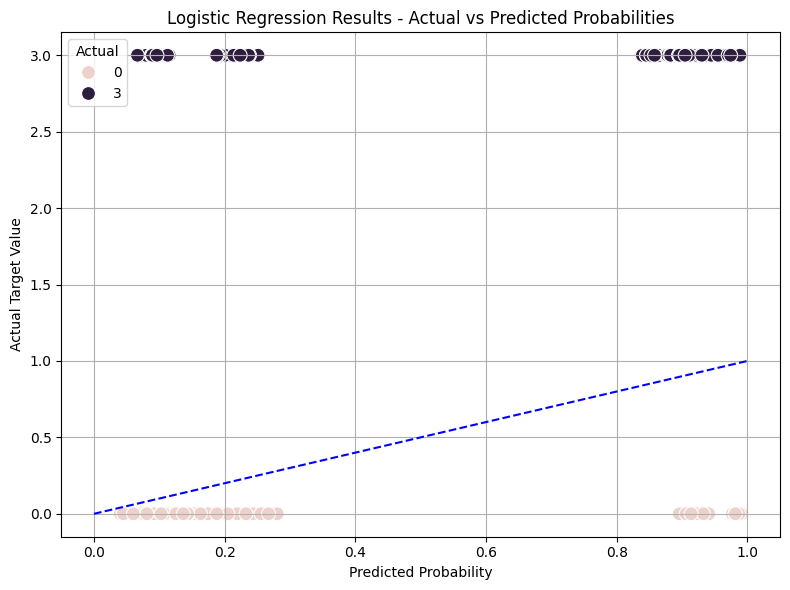

Confusion Matrix:


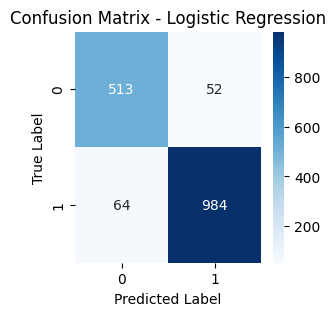


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       565
           3       0.95      0.94      0.94      1048

    accuracy                           0.93      1613
   macro avg       0.92      0.92      0.92      1613
weighted avg       0.93      0.93      0.93      1613



In [128]:
# Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize=(8, 6))

sns.scatterplot(x=model_lr.predict_proba(X_test_data)[:, 1], y=y_test_data, hue=y_test_data, marker='o', s=100)
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Target Value')
plt.title('Logistic Regression Results - Actual vs Predicted Probabilities')

plt.plot([0, 1], [0, 1], linestyle='--', color='blue')

plt.legend(title='Actual')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test_data, y_pred_data)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_data, y_pred_data))


AUC: 0.923260487738972


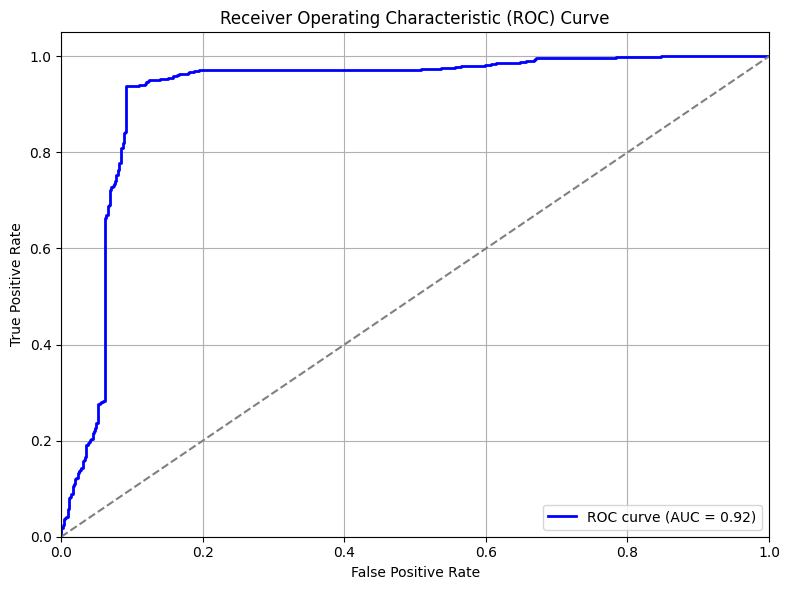

In [129]:
# ROC Curve and AUC
y_score = model_lr.predict_proba(X_test_data)[:, 1]

fpr, tpr, _ = roc_curve(y_test_data, y_score, pos_label=3)

roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [130]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train_data, y_train_data)
y_pred_rf = model_rf.predict(X_test_data)

accuracy_rf = accuracy_score(y_test_data, y_pred_rf)
mse_rf = mean_squared_error(y_test_data, y_pred_rf)
rmse_rf = mean_squared_error(y_test_data, y_pred_rf, squared=False)

print(f"Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")


Random Forest Classifier Results:
Accuracy: 0.9975201487910725
MSE: 0.022318660880347178
RMSE: 0.1493943134136878


In [131]:
# Matthews Correlation Coefficient and Accuracy Score
mcc_rf = matthews_corrcoef(y_test_data, y_pred_rf)
print("MCC for Random Forest Classifier: %.3f" % mcc_rf)

acc_rf = accuracy_score(y_test_data, y_pred_rf)
print("Accuracy for Random Forest Classifier: %.3f" % acc_rf)

MCC for Random Forest Classifier: 0.995
Accuracy for Random Forest Classifier: 0.998


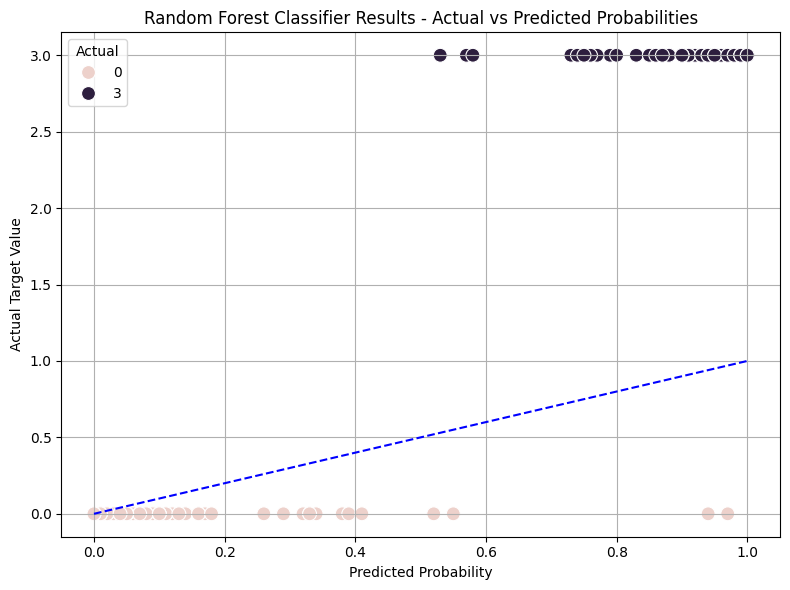

Confusion Matrix:


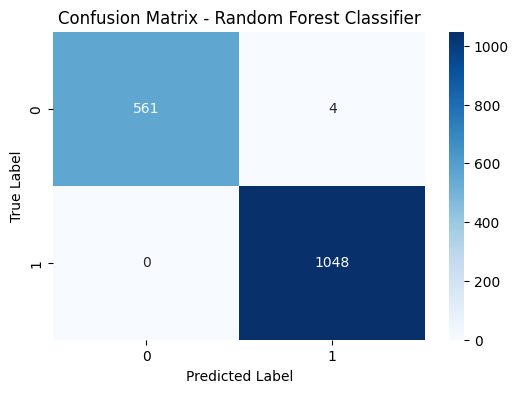


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       565
           3       1.00      1.00      1.00      1048

    accuracy                           1.00      1613
   macro avg       1.00      1.00      1.00      1613
weighted avg       1.00      1.00      1.00      1613



In [132]:
# Confusion Matrix and Classification report
plt.figure(figsize=(8, 6))

sns.scatterplot(x=model_rf.predict_proba(X_test_data)[:, 1], y=y_test_data, hue=y_test_data, marker='o', s=100)
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Target Value')
plt.title('Random Forest Classifier Results - Actual vs Predicted Probabilities')

plt.plot([0, 1], [0, 1], linestyle='--', color='blue')

plt.legend(title='Actual')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Confusion Matrix:")
conf_matrix_rf = confusion_matrix(y_test_data, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_data, y_pred_rf))


AUC for Random Forest Classifier: 0.999837026278457


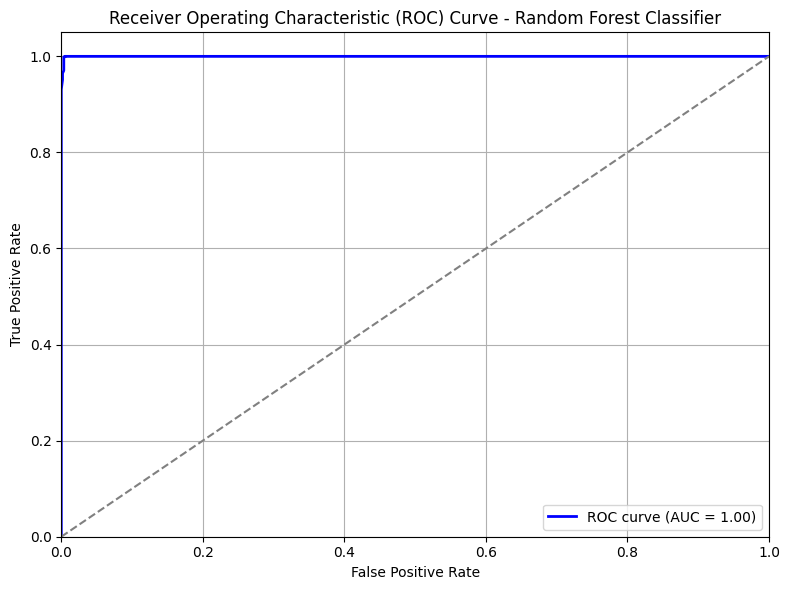

In [133]:
# ROC Curve and AUC
y_score_rf = model_rf.predict_proba(X_test_data)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test_data, y_score_rf, pos_label=3)

roc_auc_rf = auc(fpr_rf, tpr_rf)
print(f"AUC for Random Forest Classifier: {roc_auc_rf}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = %.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [134]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions
param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create RandomForestClassifier
rf = RandomForestClassifier()

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train_data, y_train_data)

# Best parameters found
print("Best parameters found:")
print(random_search.best_params_)

# Best estimator
best_rf = random_search.best_estimator_

# Evaluate best model on test data
y_pred_best = best_rf.predict(X_test_data)
accuracy_best = accuracy_score(y_test_data, y_pred_best)
print("\nAccuracy on test data with best model:", accuracy_best)

Best parameters found:
{'max_depth': 47, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 69}

Accuracy on test data with best model: 0.9956602603843769


In [135]:
# Accurace MSE and RMSE after HyperParameter Tuning
accuracy_best = accuracy_score(y_test_data, y_pred_best)
mse_best = mean_squared_error(y_test_data, y_pred_best)
rmse_best = mean_squared_error(y_test_data, y_pred_best, squared=False)

print(f"Random Forest Classifier after HyperParameter Tuning Results:")
print(f"Accuracy: {accuracy_best}")
print(f"MSE: {mse_best}")
print(f"RMSE: {rmse_best}")

Random Forest Classifier after HyperParameter Tuning Results:
Accuracy: 0.9956602603843769
MSE: 0.03905765654060756
RMSE: 0.19763010028992942


In [136]:
# Matthews Correlation Coefficient and Accuracy Score after HyperParameter Tuning
mcc_best = matthews_corrcoef(y_test_data, y_pred_best)
print("MCC for Random Forest Classifier: %.3f" % mcc_best)

acc_best = accuracy_score(y_test_data, y_pred_best)
print("Accuracy for Random Forest Classifier: %.3f" % acc_best)

MCC for Random Forest Classifier: 0.990
Accuracy for Random Forest Classifier: 0.996


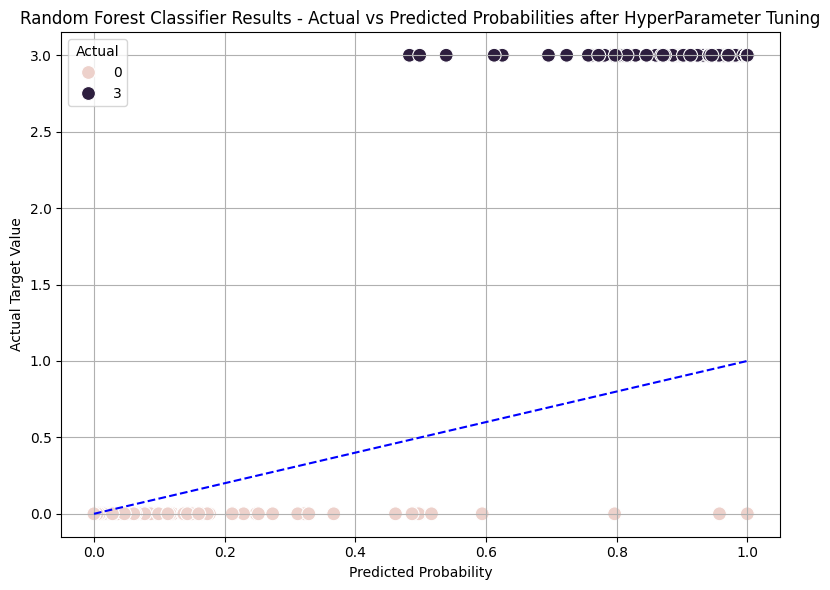

Confusion Matrix after HyperParameter Tuning:


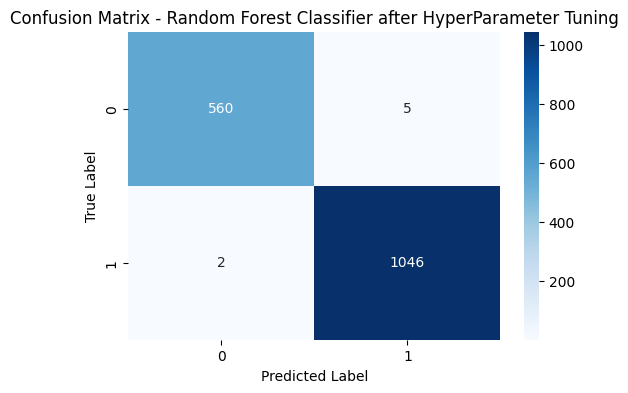


Classification Report after HyperParameter Tuning:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       565
           3       1.00      1.00      1.00      1048

    accuracy                           1.00      1613
   macro avg       1.00      0.99      1.00      1613
weighted avg       1.00      1.00      1.00      1613



In [137]:
# Confusion Matrix and Classification report after HyperParameter Tuning
plt.figure(figsize=(8, 6))

sns.scatterplot(x=best_rf.predict_proba(X_test_data)[:, 1], y=y_test_data, hue=y_test_data, marker='o', s=100)
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Target Value')
plt.title('Random Forest Classifier Results - Actual vs Predicted Probabilities after HyperParameter Tuning')

plt.plot([0, 1], [0, 1], linestyle='--', color='blue')

plt.legend(title='Actual')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Confusion Matrix after HyperParameter Tuning:")
conf_matrix_best = confusion_matrix(y_test_data, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Classifier after HyperParameter Tuning')
plt.show()

print("\nClassification Report after HyperParameter Tuning:")
print(classification_report(y_test_data, y_pred_best))

AUC for Random Forest Classifier after HyperParameter Tuning: 0.9987958521921232


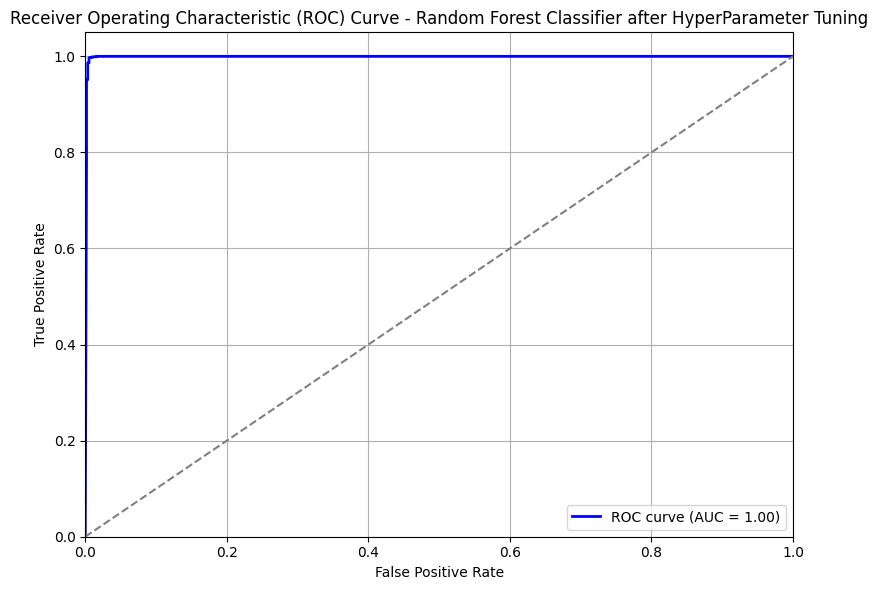

In [138]:
#ROC Curve and AUC after HyperParameter Tuning
y_score_best = best_rf.predict_proba(X_test_data)[:, 1]

fpr_best, tpr_best, _ = roc_curve(y_test_data, y_score_best, pos_label=3)

roc_auc_best = auc(fpr_best, tpr_best)
print(f"AUC for Random Forest Classifier after HyperParameter Tuning: {roc_auc_best}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='blue', lw=2, label='ROC curve (AUC = %.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest Classifier after HyperParameter Tuning')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [139]:
from sklearn.svm import SVC

model_svc = SVC(probability=True)
model_svc.fit(X_train_data, y_train_data)
y_pred_svc = model_svc.predict(X_test_data)

accuracy_svc = accuracy_score(y_test_data, y_pred_svc)
mse_svc = mean_squared_error(y_test_data, y_pred_svc)
rmse_svc = mean_squared_error(y_test_data, y_pred_svc, squared=False)

print("Support Vector Classifier Results:")
print(f"Accuracy: {accuracy_svc}")
print(f"MSE: {mse_svc}")
print(f"RMSE: {rmse_svc}")


Support Vector Classifier Results:
Accuracy: 0.9479231246125233
MSE: 0.46869187848729077
RMSE: 0.684610749614181


In [140]:
# Matthews Correlation Coefficient and Accuracy Score
mcc_svc = matthews_corrcoef(y_test_data, y_pred_svc)
print("MCC for Support Vector Classifier: %.3f" % mcc_svc)

acc_svc = accuracy_score(y_test_data, y_pred_svc)
print("Accuracy for Support Vector Classifier: %.3f" % acc_svc)

MCC for Support Vector Classifier: 0.885
Accuracy for Support Vector Classifier: 0.948


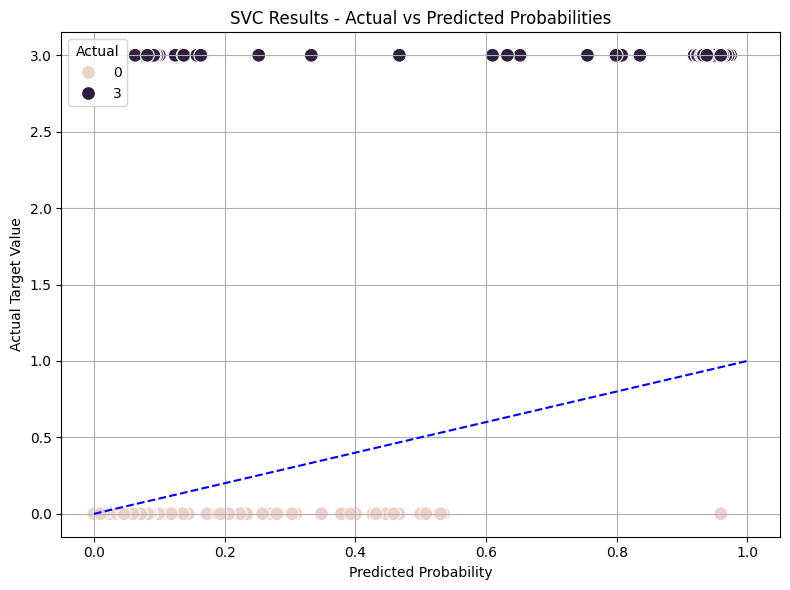

Confusion Matrix:


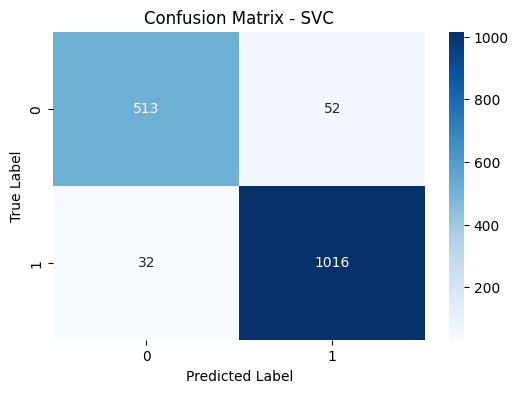


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       565
           3       0.95      0.97      0.96      1048

    accuracy                           0.95      1613
   macro avg       0.95      0.94      0.94      1613
weighted avg       0.95      0.95      0.95      1613



In [141]:
# Confusion Matrix and Classification report
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model_svc.predict_proba(X_test_data)[:, 1], y=y_test_data, hue=y_test_data, marker='o', s=100)
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Target Value')
plt.title('SVC Results - Actual vs Predicted Probabilities')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.legend(title='Actual')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Confusion Matrix:")
conf_matrix_svc = confusion_matrix(y_test_data, y_pred_svc)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVC')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_data, y_pred_svc))


AUC for SVC: 0.9531311220698507


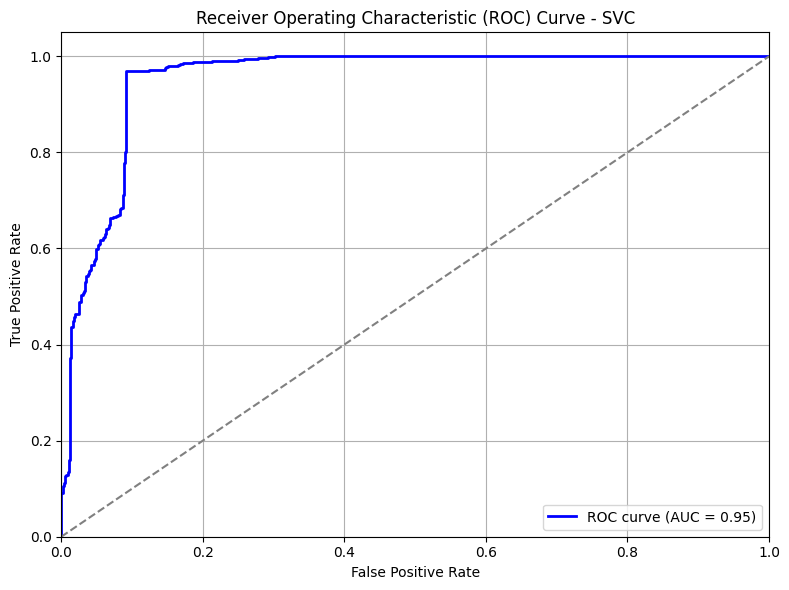

In [142]:
# ROC Curve and AUC
y_score_svc = model_svc.predict_proba(X_test_data)[:, 1]

fpr_svc, tpr_svc, _ = roc_curve(y_test_data, y_score_svc, pos_label=3)

roc_auc_svc = auc(fpr_svc, tpr_svc)
print(f"AUC for SVC: {roc_auc_svc}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='blue', lw=2, label='ROC curve (AUC = %.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVC')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [143]:
y_test_plot = df[TARGET_VAR]
h_test_plot = df[HIDDEN_VARS]
X_test_plot = df.drop(columns=[TARGET_VAR] + HIDDEN_VARS)

# PCA transformation
n_components = 4
pca = PCA(n_components=n_components)
X_test_plot = pca.fit_transform(X_test_plot)

# Alert Trigger Function

def alert_trigger(horizon, proba, threshold):
    df = pd.DataFrame({'proba': proba})
    df['rolling_mean_proba'] = df.rolling(horizon).mean()
    df['fault'] = 0
    df.loc[df['rolling_mean_proba'] >= threshold, 'fault'] = 1.
    return df['fault'].values

# Plot Proba Function

def plot_proba(ax, y_true, y_prob, fault_var, fault_var_data, title=None):
    ax.plot(range(len(y_true)), y_true, label='Ground truth', color='blue')
    ax.plot(range(len(y_prob)), y_prob, '.', label='Fault Detection probability', color='orange')
    # ax.legend()

    if(title is not None):
        ax.title.set_text(title)

    axtwin0 = ax.twinx()
    axtwin0.plot(range(len(fault_var_data)), fault_var_data, label=fault_var, color='grey')
    axtwin0.legend()

# Plot True False Function

def plot_true_false(ax, y_true, y_pred, fault_var, fault_var_data, title=None):
    df = pd.DataFrame({'true': y_true, 'pred' : y_pred})
    df['t_pred'] = df.loc[df['true'] == df['pred'], 'pred']
    df['f_pred'] = df.loc[df['true'] != df['pred'], 'pred']

    ax.plot(range(len(df)) , y_true , label='Ground truth', color='blue')
    ax.plot(range(len(df)), df['t_pred'], 'x', label='Correct Fault Detection', color='green')
    ax.plot(range(len(df)), df['f_pred'], 'x', label='Wrong Fault Detection', color='red')

    # ax.legend()

    if(title is not None):
        ax.title.set_text(title)

    axtwin1 = ax.twinx()
    axtwin1.plot(range(len(y_true)), fault_var_data, label=fault_var, color='grey')
    axtwin1.legend()


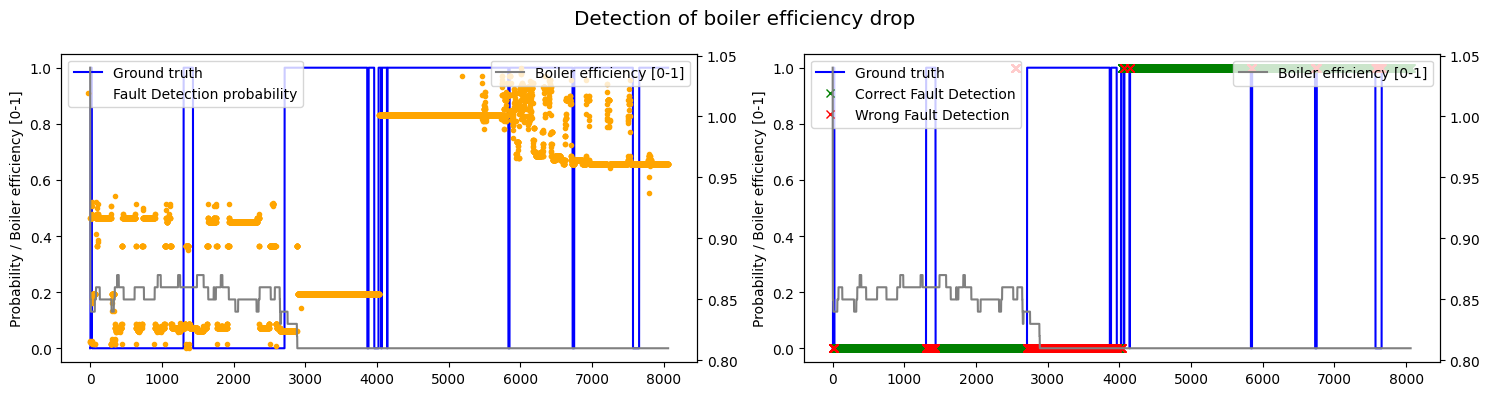

In [144]:
fault_var = 'eta'
fault_var_label = 'Boiler efficiency [0-1]'

titles = 'Detection of boiler efficiency drop'

nb_test = 1
fig, ax = plt.subplots(nrows=nb_test, ncols=2, figsize=(15, 4*nb_test))
fig.suptitle(titles, fontsize='x-large')

y_data = y_test_plot.values.astype(np.float64) / 3
y_prob = best_rf.predict_proba(X_test_plot)[:, 1]
y_pred = alert_trigger(horizon=4, proba=y_prob, threshold=0.5)
fault_var_data = h_test_plot[fault_var].values.astype(np.float64)

plot_proba(ax[0], y_data, y_prob, fault_var_label, fault_var_data)
plot_true_false(ax[1], y_data, y_pred, fault_var_label, fault_var_data)
# Adjust legend positions and titles
ax[0].legend(loc='upper left', fontsize='medium')
ax[0].set_ylabel('Probability / ' + fault_var_label)
ax[1].legend(loc='upper left', fontsize='medium')
ax[1].set_ylabel('Probability / ' + fault_var_label)
plt.tight_layout()
plt.show()


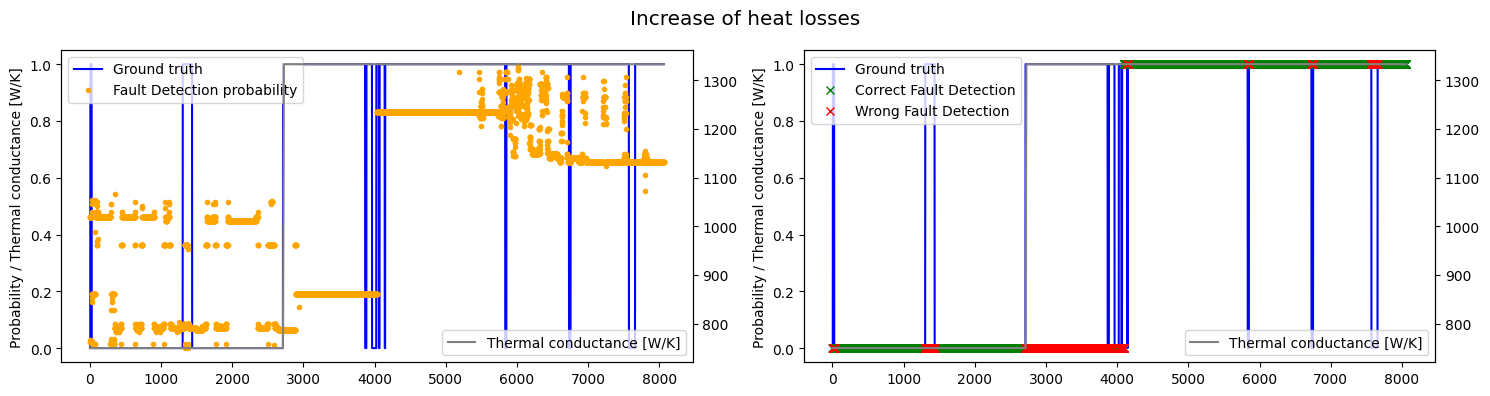

In [145]:
fault_var = 'G_losses'
fault_var_label = 'Thermal conductance [W/K]'

titles = 'Increase of heat losses'

nb_test = 1
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4*nb_test))
fig.suptitle(titles, fontsize='x-large')

y_data = y_test_plot.values.astype(np.float64) / 3
y_prob = best_rf.predict_proba(X_test_plot)[:, 1]
y_pred = alert_trigger(horizon=144, proba=y_prob, threshold=0.5)
fault_var_data = h_test_plot[fault_var].values.astype(np.float64)

plot_proba(ax[0], y_data, y_prob, fault_var_label, fault_var_data)
plot_true_false(ax[1], y_data, y_pred, fault_var_label, fault_var_data)

# Adjust legend positions and titles
ax[0].legend(loc='upper left', fontsize='medium')
ax[0].set_ylabel('Probability / ' + fault_var_label)
ax[1].legend(loc='upper left', fontsize='medium')
ax[1].set_ylabel('Probability / ' + fault_var_label)

plt.tight_layout()
plt.show()
